# Count if two words are the conjugaison of each other

## O(n**2)
python thonpy
Compare character by charater by starting with one of them. We compare its first character with all the characters of the other word. Once we find a correspondance, we mark this character, and we start to check the second character and so on. If for one character, after checking all characters of the second word but no correspondance has been found, then we end our check by returning false
How to compare, we need to a pointer and a condition. The first one helps us check one by one, then second one controls the correspondance, we need 2 conditons, one to tell the program for one character if there is a correspondance of not, if not, we pass the information to our main loop to tell it when ends.


In [ ]:
def sort(word1,word2):
# since in Python, str can not be modified, so we need to copy it by turning it into a list which is a changable type
    alist = list(word2)
    pos1 = 0
    stillOk = True
    while pos1 < len(word1) and stillOk:
        pos2 = 0
        found = False
        while pos2 < len(word2) and not found:
            if word1[pos1] == word2[pos2]:
                found = True
            else:
                pos2 += 1
        if found:
            pos1 += 1
            alist[pos2] = None
        else:
            stillOk = False
    return stillOk

## O(n)
more quick more menmory used
for alphabetic words, another way to know if they are the conjugaison of each other is to use a alphabetic calculator. For two words, if they have the same occurrency for each character, it means they are.
build 2 calculators
for each word, count the occurrency of its characters
compare the information stored in calculators using pointer

In [16]:
def quick_one(word1, word2):
    cal1 = {}
    cal2 = {}

    for w in word1:
        if w not in cal1:
            cal1[w] = 1
        cal1[w] += 1

    for w in word2:
        if w not in cal2:
            cal2[w] = 1
        cal2[w] += 1


    for char in word1:
        found = True
        if char not in cal2 or cal1[char] != cal2[char]: # handle two situations: if the word does not even exist in the second word, return false. Or, if it exists, by they do not have the same value, returns false
            found = False
            return found
    return found

print(quick_one("python","thonpy"))

True


In [1]:
from timeit import Timer

def test1(a):
    p = []
    for i in range(1000):
        p = p + [i]

def test2():
    p = [i for i in range(1000)]

def test3():
     p = []
     for i in range(1000):
         p.append(i)

def test4():
    l = list(range(1000))

t1 = Timer("test1(100)","from __main__ import test1")
print(t1.timeit(number=1000)) # number means times of executation

t2 = Timer("test2()","from __main__ import test2")
print(t2.timeit(number=1000))

t3 = Timer("test3()","from __main__ import test3")
print(t3.timeit(number=1000))

t4 = Timer("test4()","from __main__ import test4")
print(t4.timeit(number=1000))

2.7948642280098284
0.050898068002425134
0.05604468499950599
0.0238326909893658


In [4]:
from timeit import Timer

def _pop_end():
    a = list(range(20000))
    a.pop()  # removes last element - O(1)

def _pop_start():
    a = list(range(20000))
    a.pop(0)  # removes first element - O(n)

p1 = Timer("_pop_end()", "from __main__ import _pop_end")
p2 = Timer("_pop_start()", "from __main__ import _pop_start")

print("Time for pop() at end:", p1.timeit(number=1000))
print("Time for pop(0) at start:", p2.timeit(number=1000))

Time for pop() at end: 0.5926632009941386
Time for pop(0) at start: 0.5741305699921213


## Compare the time complexity of implemented methods of list and dict in Python
`https://wiki.python.org/moin/TimeComplexity`

Size: 10000
List search time: 0.153525
Dict search time: 0.000843
----------------------------------------
Size: 70000
List search time: 0.680846
Dict search time: 0.001344
----------------------------------------
Size: 130000
List search time: 1.174464
Dict search time: 0.001571
----------------------------------------
Size: 190000
List search time: 1.644356
Dict search time: 0.000963
----------------------------------------
Size: 250000
List search time: 2.153218
Dict search time: 0.001094
----------------------------------------
Size: 310000
List search time: 2.656710
Dict search time: 0.001068
----------------------------------------
Size: 370000
List search time: 3.153477
Dict search time: 0.000995
----------------------------------------
Size: 430000
List search time: 3.517819
Dict search time: 0.000996
----------------------------------------
Size: 490000
List search time: 4.674870
Dict search time: 0.001103
----------------------------------------
Size: 550000
List search time:

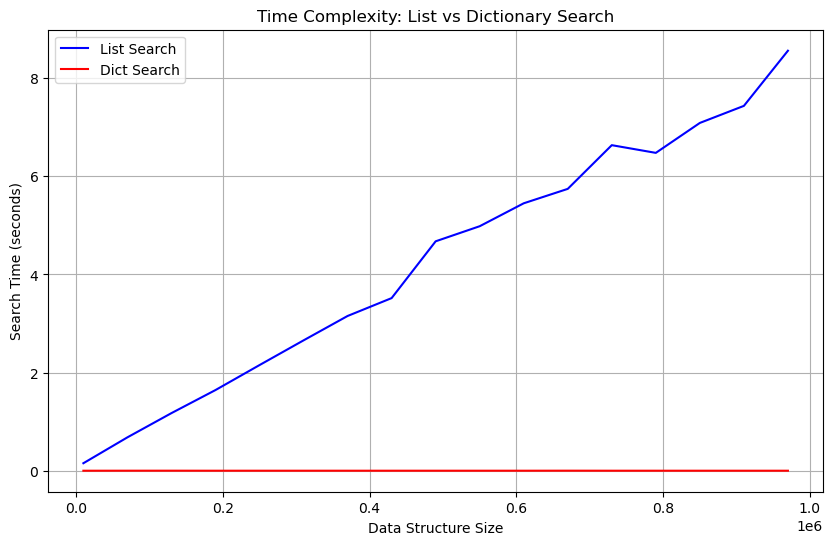

In [ ]:
import random
import timeit
import matplotlib.pyplot as plt

def compare_operations():
    sizes = []
    list_times = []
    dict_times = []
    
    for i in range(10000, 1000001, 60000):
        # Create test data
        t = list(range(i))
        p = {j: None for j in range(i)}
        
        # Time list operations
        list_time = timeit.timeit(
            lambda: random.randrange(i) in t,
            number=1000
        )
        
        # Time dictionary operations
        dict_time = timeit.timeit(
            lambda: random.randrange(i) in p,
            number=1000
        )
        
        # Store results
        sizes.append(i)
        list_times.append(list_time)
        dict_times.append(dict_time)
        
        print(f"Size: {i}")
        print(f"List search time: {list_time:.6f}")
        print(f"Dict search time: {dict_time:.6f}")
        print("-" * 40)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, list_times, 'b-', label='List Search')
    plt.plot(sizes, dict_times, 'r-', label='Dict Search')
    plt.xlabel('Data Structure Size')
    plt.ylabel('Search Time (seconds)')
    plt.title('Time Complexity: List vs Dictionary Search')
    plt.legend()
    plt.grid(True)
    plt.show()

compare_operations()